<a href="https://colab.research.google.com/github/aniketmaurya/vision/blob/master/histopathologic_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en-GB;q=0.9,en;q=0.8" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/11848/188759/all.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1548230207&Signature=OeA1lBwgmL3yenKYs%2FTyFbv%2FJljtQDjHvmSvBtoLrnFbbLX2z%2FOcbWaRdy2HZrUWj9JummscKMibOEst3UB93CR0XO4IVI%2B1sti%2FuP1sbiO3kAzNoI3FPT9fIAkvbOxDa82akbL1XHp%2FKyO45wedyuKDyxyxQ8vPFFszPj7Zr0pu%2BI9%2FwMmIpTE31IdFYGfGxUjWY0JNV7rHmuVCQ%2BtLcm3fsaAMMlHc3afoEo0xjuecTCny%2F9ShiuIj0bNWQLBcrUXGVgvcPRXbJFnd%2FPhCk%2FWezN55K2LTLybR284eyNzar60qhrthTYhrQMPAy3LtdDvnMTgHJTqX10coOIb1oA%3D%3D" -O "all.zip" -c

--2019-01-20 08:17:12--  https://storage.googleapis.com/kaggle-competitions-data/kaggle/11848/188759/all.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1548230207&Signature=OeA1lBwgmL3yenKYs%2FTyFbv%2FJljtQDjHvmSvBtoLrnFbbLX2z%2FOcbWaRdy2HZrUWj9JummscKMibOEst3UB93CR0XO4IVI%2B1sti%2FuP1sbiO3kAzNoI3FPT9fIAkvbOxDa82akbL1XHp%2FKyO45wedyuKDyxyxQ8vPFFszPj7Zr0pu%2BI9%2FwMmIpTE31IdFYGfGxUjWY0JNV7rHmuVCQ%2BtLcm3fsaAMMlHc3afoEo0xjuecTCny%2F9ShiuIj0bNWQLBcrUXGVgvcPRXbJFnd%2FPhCk%2FWezN55K2LTLybR284eyNzar60qhrthTYhrQMPAy3LtdDvnMTgHJTqX10coOIb1oA%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.206.128, 2a00:1450:400c:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.206.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6741705245 (6.3G) [application/zip]
Saving to: ‘all.zip’

all.zip             100%[===================>]   6.28G   151MB/s    in 57s     

2019-01-20 08:18:10 (113 MB/s) - ‘all

In [0]:
!ls

sample_data  sample_submission.csv  train_labels.csv


In [0]:
!pip install fastai

In [0]:
from fastai.vision import *
from IPython.display import clear_output

In [0]:
!ls

all.zip  sample_data


In [0]:
!unzip all.zip
!rm all.zip

Archive:  all.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
  inflating: test.zip                

replace train_labels.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [{ENTER}]
replace train_labels.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: train_labels.csv        
  inflating: train.zip               


In [0]:
!ls

sample_data  sample_submission.csv  test.zip  train_labels.csv	train.zip


In [0]:
!unzip train.zip -d train
clear_output()

In [0]:
!ls

models	sample_data  sample_submission.csv  test  train  train_labels.csv


In [0]:
ds_tfms=get_transforms(flip_vert=True, max_lighting=0.1, max_warp=0.)
data = ImageDataBunch.from_csv('', folder='train', size=96, suffix='.tif', sep=' ', csv_labels='train_labels.csv', test = 'test')
data.normalize()

ImageDataBunch;

Train: LabelList
y: MultiCategoryList (176020 items)
[MultiCategory 0, MultiCategory 1, MultiCategory 0, MultiCategory 0, MultiCategory 0]...
Path: .
x: ImageItemList (176020 items)
[Image (3, 96, 96), Image (3, 96, 96), Image (3, 96, 96), Image (3, 96, 96), Image (3, 96, 96)]...
Path: .;

Valid: LabelList
y: MultiCategoryList (44005 items)
[MultiCategory 0, MultiCategory 1, MultiCategory 0, MultiCategory 0, MultiCategory 1]...
Path: .
x: ImageItemList (44005 items)
[Image (3, 96, 96), Image (3, 96, 96), Image (3, 96, 96), Image (3, 96, 96), Image (3, 96, 96)]...
Path: .;

Test: LabelList
y: EmptyLabelList (57458 items)
[EmptyLabel , EmptyLabel , EmptyLabel , EmptyLabel , EmptyLabel ]...
Path: .
x: ImageItemList (57458 items)
[Image (3, 96, 96), Image (3, 96, 96), Image (3, 96, 96), Image (3, 96, 96), Image (3, 96, 96)]...
Path: .

In [0]:
pd.read_csv('train_labels.csv').head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


In [0]:
learn = create_cnn(data, models.resnet50, metrics=[fbeta])

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,fbeta


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


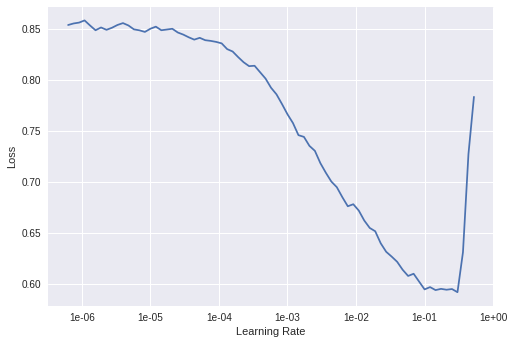

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,fbeta
1,0.208267,0.183057,0.949903


In [0]:
torch.cuda.empty_cache()

In [0]:
data.train_ds

LabelList
y: MultiCategoryList (176020 items)
[MultiCategory 0, MultiCategory 1, MultiCategory 0, MultiCategory 0, MultiCategory 0]...
Path: .
x: ImageItemList (176020 items)
[Image (3, 96, 96), Image (3, 96, 96), Image (3, 96, 96), Image (3, 96, 96), Image (3, 96, 96)]...
Path: .

In [0]:
#learn.predict(data.test_ds)

In [0]:
??learn.predict

In [0]:
!nvidia-smi

Sun Jan 20 10:58:14 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 396.44                 Driver Version: 396.44                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    73W / 149W |    624MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

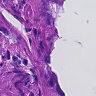

In [0]:
data.train_ds[25][0]

In [0]:
learn.predict(data.train_ds[25][0])

(MultiCategory 1, tensor([0., 1.]), tensor([0.3131, 0.6927]))